In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image
from PIL.ExifTags import TAGS
from glob import glob
from skimage.io import imread

In [2]:
def extract_infos(path):
    
    infos = Image.open(path).getexif()
    
    for tagid in infos:
        if TAGS.get(tagid, tagid) == "DateTime":
            return infos.get(tagid)

In [3]:
folder_images_paths = "coletas/Dia 29-11-2022/images/*"

In [4]:
data = pd.DataFrame(
    [{
        "date": extract_infos(path), 
        "path": path
    } for path in glob(folder_images_paths)]
).sort_values("date")

In [5]:
data

,date,path
68,2022:11:29 16:25:21,coletas/Dia 29-11-2022/images/IMG_20221129_162...
69,2022:11:29 16:26:18,coletas/Dia 29-11-2022/images/IMG_20221129_162...
7,2022:11:29 16:27:07,coletas/Dia 29-11-2022/images/IMG_20221129_162...
46,2022:11:29 16:27:56,coletas/Dia 29-11-2022/images/IMG_20221129_162...
38,2022:11:29 16:28:50,coletas/Dia 29-11-2022/images/IMG_20221129_162...
...,...,...
19,2022:11:29 17:51:53,coletas/Dia 29-11-2022/images/IMG_20221129_175...
9,2022:11:29 17:52:33,coletas/Dia 29-11-2022/images/IMG_20221129_175...
8,2022:11:29 17:53:37,coletas/Dia 29-11-2022/images/IMG_20221129_175...
53,2022:11:29 17:54:18,coletas/Dia 29-11-2022/images/IMG_20221129_175...


In [7]:
data

,date,path
68,2022:11:29 16:25:21,coletas/Dia 29-11-2022/images/IMG_20221129_162...
69,2022:11:29 16:26:18,coletas/Dia 29-11-2022/images/IMG_20221129_162...
7,2022:11:29 16:27:07,coletas/Dia 29-11-2022/images/IMG_20221129_162...
46,2022:11:29 16:27:56,coletas/Dia 29-11-2022/images/IMG_20221129_162...
38,2022:11:29 16:28:50,coletas/Dia 29-11-2022/images/IMG_20221129_162...
...,...,...
19,2022:11:29 17:51:53,coletas/Dia 29-11-2022/images/IMG_20221129_175...
9,2022:11:29 17:52:33,coletas/Dia 29-11-2022/images/IMG_20221129_175...
8,2022:11:29 17:53:37,coletas/Dia 29-11-2022/images/IMG_20221129_175...
53,2022:11:29 17:54:18,coletas/Dia 29-11-2022/images/IMG_20221129_175...


In [8]:
for path in data.path.values:
    
    print(path.split("/")[-1])
    
    # plt.figure(figsize=(5, 5))
    # plt.imshow(imread(path)[::10, ::10])
    # plt.show()

IMG_20221129_162521.jpg
IMG_20221129_162618.jpg
IMG_20221129_162707.jpg
IMG_20221129_162756.jpg
IMG_20221129_162850.jpg
IMG_20221129_163018.jpg
IMG_20221129_163058.jpg
IMG_20221129_163208.jpg
IMG_20221129_163517.jpg
IMG_20221129_163737.jpg
IMG_20221129_163936.jpg
IMG_20221129_164020.jpg
IMG_20221129_164056.jpg
IMG_20221129_164141.jpg
IMG_20221129_164252.jpg
IMG_20221129_164339.jpg
IMG_20221129_164733.jpg
IMG_20221129_164858.jpg
IMG_20221129_165024.jpg
IMG_20221129_165542.jpg
IMG_20221129_165628.jpg
IMG_20221129_165725.jpg
IMG_20221129_165832.jpg
IMG_20221129_165914.jpg
IMG_20221129_170025.jpg
IMG_20221129_170106.jpg
IMG_20221129_170154.jpg
IMG_20221129_170324.jpg
IMG_20221129_170417.jpg
IMG_20221129_170514.jpg
IMG_20221129_170728.jpg
IMG_20221129_170801.jpg
IMG_20221129_170922.jpg
IMG_20221129_171015.jpg
IMG_20221129_171129.jpg
IMG_20221129_171216.jpg
IMG_20221129_171337.jpg
IMG_20221129_171455.jpg
IMG_20221129_171558.jpg
IMG_20221129_171642.jpg
IMG_20221129_171722.jpg
IMG_20221129_171

In [155]:
from yellowbrick.style import set_palette
from yellowbrick.style.palettes import PALETTES

In [156]:
PALETTES.keys()

dict_keys(['yellowbrick', 'accent', 'dark', 'pastel', 'bold', 'muted', 'reset', 'colorblind', 'sns_colorblind', 'sns_deep', 'sns_muted', 'sns_pastel', 'sns_bright', 'sns_dark', 'flatui', 'paired', 'set1', 'neural_paint'])

In [182]:
set_palette("sns_deep")

In [9]:
from sklearn.model_selection import train_test_split
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError, ResidualsPlot
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [10]:
# import warnings
# warnings.filterwarnings('ignore')

plt.style.use('default')
# plt.style.use('ggplot')
# plt.style.use('fivethirtyeight')
# plt.style.use('grayscale')

In [11]:
X, y = load_concrete()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

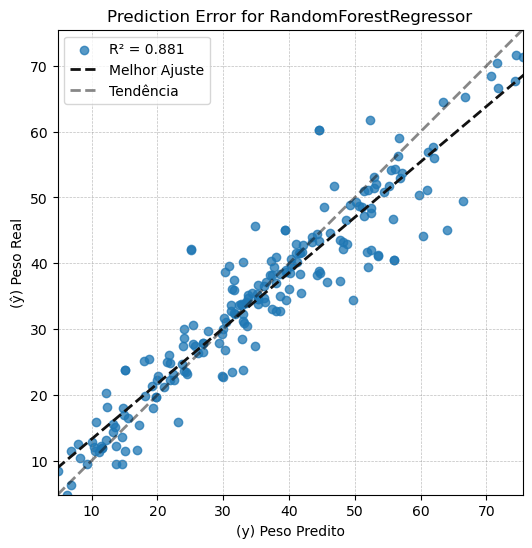

In [187]:
fig, ax = plt.subplots(figsize=(6, 10))

# Fit the visualizer
model = PredictionError(RandomForestRegressor(random_state=0), ax=ax)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)

model.finalize()

ax.set_xlabel("(y) Peso Predito")
ax.set_ylabel("(ŷ) Peso Real")
ax.legend([f"R² = {round(score, 3)}", "Melhor Ajuste", "Tendência"])

ax.grid(color='gray', 
        linestyle='--',
        linewidth=0.5,
        alpha=0.5)

plt.savefig("peplot.pdf")

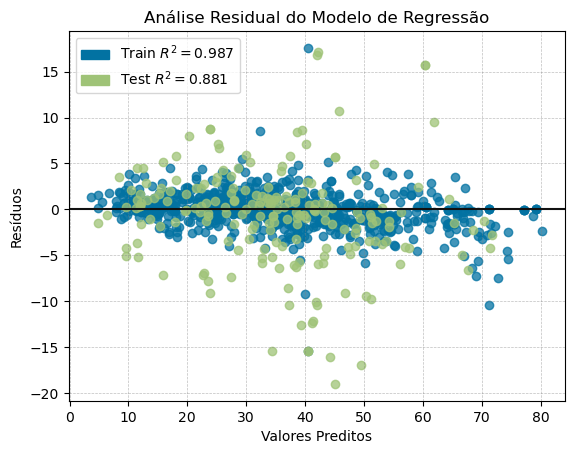

In [189]:
visualizer = ResidualsPlot(RandomForestRegressor(random_state=0), hist=False)

visualizer.fit(X_train, y_train)

test_score = visualizer.score(X_test, y_test)

visualizer.finalize()

# visualizer.ax.legend([f"Treino R² = {round(train_score, 3)}", f"Teste R² = {round(test_score, 3)}"], loc="upper left")

visualizer.ax.set_xlabel("Valores Preditos")
visualizer.ax.set_ylabel("Resíduos")
visualizer.ax.set_title("Análise Residual do Modelo de Regressão")
visualizer.ax.grid(color='gray', 
                   linestyle='--',
                   linewidth=0.5,
                   alpha=0.5)

plt.savefig("peplot.pdf")